In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('../Datasets/epi_r.csv')

In [3]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#data exploration / feature engineering
raw_data.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       ...
       'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack week', 'turkey'],
      dtype='object', length=680)

In [5]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


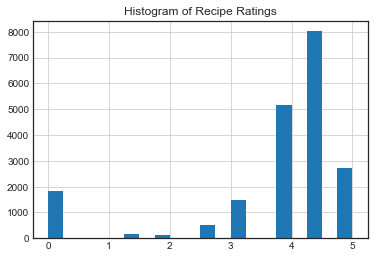

In [7]:
#25% is higher than the mean, means there may be outliers
sns.set_style('white')
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [8]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [9]:
features = raw_data.loc[:, ~(raw_data.columns).isin(['calories', 'protein', 'fat', 'sodium'])]
features.head()

,title,rating,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 676 entries, title to turkey
dtypes: float64(675), object(1)
memory usage: 103.3+ MB


In [11]:
#find the min total for feature requires before keeping it
features.iloc[:, 2:].sum().describe()

count     674.000000
mean      362.885757
std       975.743648
min         1.000000
25%        10.000000
50%        69.000000
75%       272.500000
max      9355.000000
dtype: float64

In [12]:
features[features['rating'] <= 3.5].sum(axis=1).describe()

count    4145.000000
mean       12.788571
std         5.657423
min         1.000000
25%         8.875000
50%        12.000000
75%        17.000000
max        31.125000
dtype: float64

In [13]:
features[(features['rating'] > 3.5) & (features['rating'] <= 4.5)].sum(axis=1).describe()

count    13188.000000
mean        16.602584
std          4.978966
min          4.750000
25%         12.375000
50%         15.750000
75%         20.375000
max         40.750000
dtype: float64

In [14]:
features[(features['rating'] > 4.5)].sum(axis=1).describe()

count    2719.000000
mean       17.324016
std         5.191674
min         6.000000
25%        13.000000
50%        17.000000
75%        21.000000
max        37.000000
dtype: float64

In [15]:
# each rating has a max of ~31 features used

In [16]:
features.iloc[:, 2:50].sum()

#cakeweek                   6.0
#wasteless                  1.0
22-minute meals            17.0
3-ingredient recipes       27.0
30 days of groceries        7.0
advance prep required     109.0
alabama                     3.0
alaska                      2.0
alcoholic                 835.0
almond                    584.0
amaretto                   39.0
anchovy                    45.0
anise                     116.0
anniversary               111.0
anthony bourdain            2.0
aperitif                   12.0
appetizer                1372.0
apple                     666.0
apple juice                 6.0
apricot                   269.0
arizona                     8.0
artichoke                 153.0
arugula                   278.0
asian pear                 20.0
asparagus                 207.0
aspen                       1.0
atlanta                     7.0
australia                   7.0
avocado                   273.0
back to school            202.0
backyard bbq              938.0
bacon   

In [17]:
features.iloc[:, 50:100].sum()

birthday                 193.0
biscuit                    7.0
bitters                  127.0
blackberry               144.0
blender                  618.0
blue cheese              235.0
blueberry                180.0
boil                     445.0
bok choy                  59.0
bon appétit             9355.0
bon app��tit              10.0
boston                     5.0
bourbon                  125.0
braise                   330.0
bran                       3.0
brandy                   270.0
bread                    499.0
breadcrumbs               55.0
breakfast                712.0
brie                      12.0
brine                     36.0
brisket                   38.0
broccoli                 122.0
broccoli rabe             48.0
broil                    489.0
brooklyn                   7.0
brown rice                23.0
brownie                    3.0
brunch                   833.0
brussel sprout            56.0
buffalo                    8.0
buffet                   132.0
bulgaria

In [18]:
features.iloc[:, 100:150].sum()

capers                185.0
caraway                29.0
cardamom               44.0
carrot                701.0
cashew                 68.0
casserole/gratin      199.0
cauliflower           120.0
caviar                  1.0
celery                341.0
chambord               15.0
champagne             106.0
chard                  85.0
chartreuse             18.0
cheddar               257.0
cheese               1355.0
cherry                244.0
chestnut               74.0
chicago                 4.0
chicken              1344.0
chickpea              162.0
chile                  13.0
chile pepper          237.0
chili                   3.0
chill                1126.0
chive                 251.0
chocolate             855.0
christmas            1039.0
christmas eve         331.0
cilantro              607.0
cinco de mayo         179.0
cinnamon              464.0
citrus                863.0
clam                  134.0
clove                 193.0
cobbler/crumble         6.0
cocktail            

In [19]:
features.iloc[:, 150:200].sum()

cookie                  69.0
cookies                273.0
coriander              131.0
corn                   371.0
cornmeal               271.0
costa mesa               1.0
cottage cheese          37.0
couscous                93.0
crab                   156.0
cranberry              370.0
cranberry sauce          4.0
cream cheese           375.0
créme de cacao          21.0
crêpe                    1.0
cr��me de cacao          1.0
cuba                     3.0
cucumber               379.0
cumin                   93.0
cupcake                  3.0
currant                108.0
curry                  273.0
custard                  2.0
dairy                 1496.0
dairy free            3206.0
dallas                   5.0
date                   123.0
deep-fry                92.0
denver                   3.0
dessert               3573.0
digestif                 5.0
dill                   271.0
dinner                2705.0
dip                     20.0
diwali                  25.0
dominican repu

In [20]:
features.iloc[:, 200:250].sum()

engagement party            184.0
england                       1.0
entertaining                  8.0
epi + ushg                    2.0
epi loves the microwave       2.0
escarole                     43.0
fall                       3015.0
family reunion              316.0
fat free                    376.0
father's day                295.0
fennel                      371.0
feta                        229.0
fig                         154.0
fish                        936.0
flaming hot summer           12.0
flat bread                    4.0
florida                      43.0
fontina                      40.0
food processor              973.0
fortified wine               76.0
fourth of july              376.0
france                       13.0
frangelico                   23.0
frankenrecipe                 1.0
freeze/chill                417.0
freezer food                  3.0
friendsgiving                 9.0
frittata                      2.0
fritter                       1.0
frozen dessert

In [21]:
features.iloc[:, 250:300].sum()

green bean               226.0
green onion/scallion     116.0
grill                    564.0
grill/barbecue          1104.0
ground beef               90.0
ground lamb               35.0
guam                       1.0
guava                     21.0
haiti                      1.0
halibut                   89.0
halloween                 42.0
ham                      222.0
hamburger                  4.0
hanukkah                 118.0
harpercollins            121.0
hawaii                     4.0
hazelnut                 182.0
healdsburg                 2.0
healthy                 2351.0
herb                    1681.0
high fiber              1013.0
hollywood                  1.0
hominy/cornmeal/masa      84.0
honey                    401.0
honeydew                  40.0
hors d'oeuvre             17.0
horseradish              166.0
hot drink                 37.0
hot pepper               487.0
house & garden           459.0
house cocktail             6.0
houston                    1.0
hummus  

In [22]:
features.iloc[:, 300:350].sum()

jícama                   36.0
kahlúa                   25.0
kale                    145.0
kansas                    3.0
kansas city               2.0
kentucky                  3.0
kentucky derby           40.0
kid-friendly           1791.0
kidney friendly        2313.0
kirsch                   31.0
kitchen olympics          1.0
kiwi                     34.0
kosher                 6175.0
kosher for passover      31.0
kumquat                  43.0
kwanzaa                  13.0
labor day                 9.0
lamb                    359.0
lamb chop                45.0
lamb shank               18.0
lancaster                 4.0
las vegas                 1.0
lasagna                   3.0
leafy green             903.0
leek                    266.0
legume                   69.0
lemon                  1104.0
lemon juice             154.0
lemongrass               84.0
lentil                   98.0
lettuce                 225.0
lima bean                55.0
lime                    546.0
lime juice

In [23]:
features.iloc[:, 350:400].sum()

lunch                  1359.0
lychee                    8.0
macadamia nut            50.0
macaroni and cheese       3.0
maine                     5.0
mandoline                10.0
mango                   244.0
maple syrup             146.0
mardi gras               59.0
margarita                20.0
marinade                  1.0
marinate                601.0
marsala                  36.0
marscarpone               6.0
marshmallow               9.0
martini                   7.0
maryland                 12.0
massachusetts            47.0
mayonnaise              378.0
meat                    285.0
meatball                  8.0
meatloaf                  2.0
melon                    62.0
mexico                    5.0
mezcal                    1.0
miami                     2.0
michigan                 24.0
microwave                37.0
midori                    6.0
milk/cream             1995.0
minneapolis               2.0
minnesota                11.0
mint                    616.0
mississipp

In [24]:
features.iloc[:, 400:450].sum()

new jersey               25.0
new mexico               15.0
new orleans               2.0
new year's day           82.0
new year's eve          165.0
new york                 49.0
no meat, no problem       6.0
no sugar added         3132.0
no-cook                1251.0
non-alcoholic           218.0
noodle                  162.0
north carolina           17.0
nut                     905.0
nutmeg                  108.0
oat                     137.0
oatmeal                  12.0
octopus                   7.0
ohio                     13.0
oklahoma                  4.0
okra                     27.0
oktoberfest              37.0
olive                   556.0
omelet                    2.0
one-pot meal             11.0
onion                  2238.0
orange                  837.0
orange juice             52.0
oregano                 101.0
oregon                   19.0
organic                   7.0
orzo                      2.0
oscars                  112.0
oyster                   38.0
pacific pa

In [25]:
features.iloc[:, 450:500].sum()

pastry                        99.0
pea                          211.0
peach                        194.0
peanut                       153.0
peanut butter                 32.0
peanut free                 8390.0
pear                         279.0
pecan                        331.0
pennsylvania                  34.0
pepper                       612.0
pernod                        54.0
persian new year               4.0
persimmon                     11.0
peru                           2.0
pescatarian                 6042.0
philippines                    5.0
phyllo/puff pastry dough     126.0
pickles                       16.0
picnic                       519.0
pie                           21.0
pine nut                     228.0
pineapple                    264.0
pistachio                    176.0
pittsburgh                    12.0
pizza                         10.0
plantain                      21.0
plum                         114.0
poach                        135.0
poblano             

In [26]:
features.iloc[:, 500:550].sum()

punch                         73.0
purim                         13.0
quail                         15.0
quiche                         1.0
quick & easy                5372.0
quick and healthy             65.0
quince                        31.0
quinoa                        51.0
rabbit                         7.0
rack of lamb                  29.0
radicchio                     18.0
radish                       208.0
raisin                       340.0
ramadan                       39.0
ramekin                       34.0
raspberry                    340.0
raw                           78.0
red wine                     271.0
rhode island                   8.0
rhubarb                       80.0
rice                         538.0
ricotta                      160.0
roast                       1320.0
root vegetable               188.0
rosemary                     371.0
rosh hashanah/yom kippur      68.0
rosé                           4.0
rub                            3.0
rum                 

In [27]:
features.iloc[:, 550:600].sum()

seattle                10.0
seed                  150.0
self                  312.0
semolina               15.0
sesame                147.0
sesame oil             42.0
shallot               353.0
shavuot                21.0
shellfish             560.0
sherry                125.0
shower                327.0
shrimp                505.0
side                 3151.0
simmer                890.0
skewer                  7.0
slow cooker            25.0
smoker                  7.0
smoothie               42.0
snapper                59.0
sorbet                  1.0
soufflé/meringue        3.0
soup/stew            1164.0
sour cream            404.0
sourdough               1.0
south carolina         10.0
soy                   111.0
soy free             8088.0
soy sauce             293.0
spain                   2.0
sparkling wine         54.0
spice                 680.0
spinach               377.0
spirit                219.0
spring               1715.0
spritzer                7.0
squash              

In [28]:
features.iloc[:, 600:650].sum()

super bowl            311.0
suzanne goin            1.0
sweet potato/yam      286.0
swiss cheese           74.0
switzerland             4.0
swordfish              16.0
taco                    8.0
tailgating            129.0
tamarind               21.0
tangerine              36.0
tapioca                14.0
tarragon              240.0
tart                    8.0
tea                   110.0
tennessee               2.0
tequila                89.0
tested & improved       1.0
texas                  23.0
thanksgiving         1458.0
thyme                 333.0
tilapia                12.0
tofu                   92.0
tomatillo              82.0
tomato               2140.0
tortillas             158.0
tree nut              107.0
tree nut free        7044.0
triple sec             80.0
tropical fruit         62.0
trout                  54.0
tuna                  134.0
turnip                 92.0
utah                    3.0
valentine's day       233.0
vanilla               267.0
veal                

In [29]:
features.iloc[:, 650:].sum()

watercress            138.0
watermelon             72.0
wedding               112.0
weelicious             33.0
west virginia           1.0
westwood                1.0
wheat/gluten-free    4906.0
whiskey                57.0
white wine            487.0
whole wheat            30.0
wild rice              18.0
windsor                 1.0
wine                  191.0
winter               3099.0
wisconsin               4.0
wok                   102.0
yellow squash          25.0
yogurt                528.0
yonkers                 1.0
yuca                    6.0
zucchini              298.0
cookbooks               3.0
leftovers               7.0
snack                  28.0
snack week             19.0
turkey                456.0
dtype: float64

In [30]:
# keep features that are used at least 400 times
features = features[['title', 'rating', 'alcoholic', 'almond', 'appetizer', 'apple', 'backyard bbq', 'bacon', 'bake', 'basil', 'bean', 'beef', 'bell pepper', 'berry', 'blender', 'boil', 'bon appétit', 'braise', 'bread', 'breakfast', 'broil', 'brunch', 'cake',
                    'carrot', 'cheese', 'chicken', 'chill', 'christmas', 'cilantro', 'cinnamon', 'citrus', 'cocktail party', 'condiment/spread', 'dairy', 'dairy free', 'dessert', 'dinner', 'drink', 'egg',
                    'fall', 'fish', 'food processor', 'freeze/chill', 'fruit', 'fruit juice', 'fry', 'garlic', 'ginger', 'gourmet', 'grill', 'grill/barbecue', 'healthy', 'herb', 'high fiber', 'honey', 'hot pepper', 'house & garden',
                    'kid-friendly', 'kidney friendly', 'kosher', 'leafy green', 'lemon', 'lime', 'low cal', 'low cholesterol', 'low fat', 'lunch', 'marinate', 'milk/cream', 'mint', 'mixer', 'mushroom', 'mustard',
                    'no sugar added', 'no-cook', 'nut', 'olive', 'onion', 'orange', 'paleo', 'parmesan', 'parsley', 'party', 'pasta', 'peanut free', 'pepper', 'pescatarian', 'picnic', 'pork', 'potato', 'potluck', 'poultry',
                    'quick & easy', 'rice', 'roast', 'salad', 'sandwich', 'sauce', 'sauté', 'seafood', 'shellfish', 'shrimp', 'side', 'simmer', 'soup/stew', 'sour cream', 'soy free', 'spice', 'spring', 'sugar conscious', 'summer',
                    'thanksgiving', 'tomato', 'tree nut free', 'vegan', 'vegetable', 'vegetarian', 'vinegar', 'walnut', 'wheat/gluten-free', 'white wine', 'winter', 'yogurt', 'turkey']]

In [31]:
features.head()

,title,rating,alcoholic,almond,appetizer,apple,backyard bbq,bacon,bake,basil,...,vegan,vegetable,vegetarian,vinegar,walnut,wheat/gluten-free,white wine,winter,yogurt,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


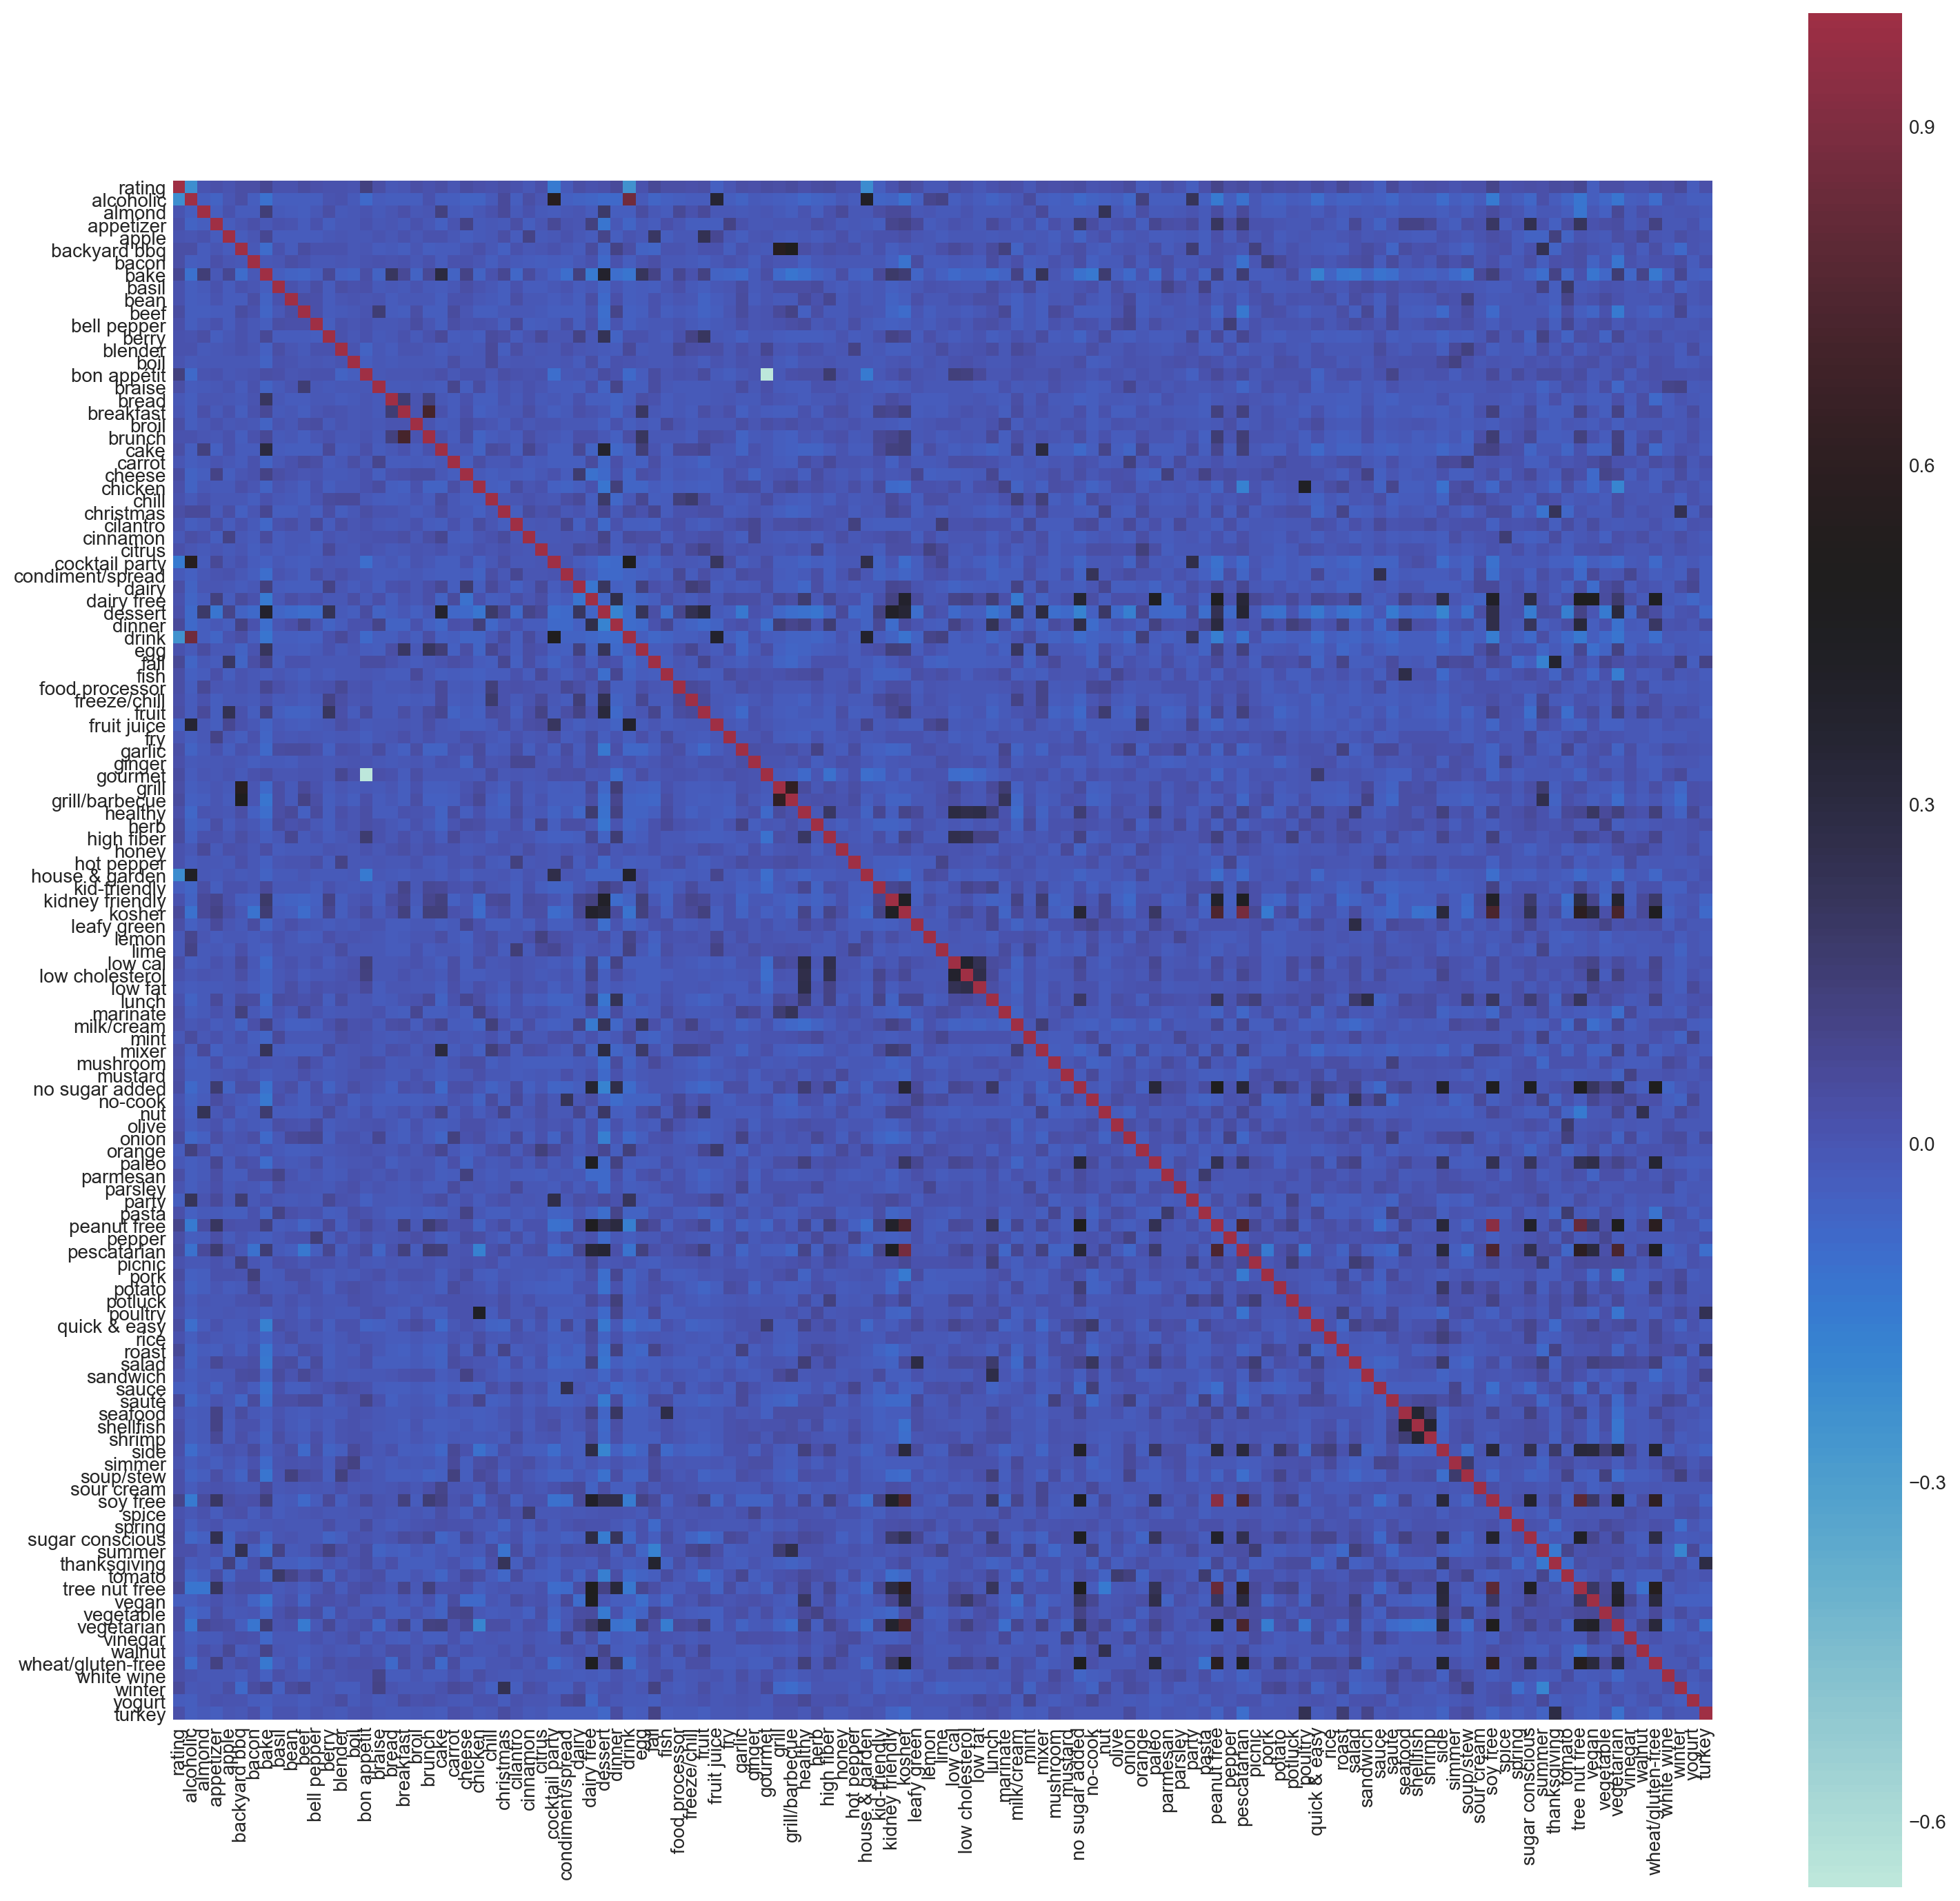

In [32]:
g = plt.figure(dpi=200, figsize=(18,18))
g = sns.heatmap(features.corr(), xticklabels=True, yticklabels=True, square=True, center=0.5)

In [33]:
# still too many features with little correlation; cull using 75%; 1700
features.iloc[:, 2:].sum().describe()

count     122.000000
mean     1618.762295
std      1816.795972
min       330.000000
25%       578.750000
50%       926.000000
75%      1754.750000
max      9355.000000
dtype: float64

In [34]:
features.iloc[:, 2:50].sum()

alcoholic            835.0
almond               584.0
appetizer           1372.0
apple                666.0
backyard bbq         938.0
bacon                587.0
bake                4413.0
basil                565.0
bean                 577.0
beef                 811.0
bell pepper          767.0
berry                465.0
blender              618.0
boil                 445.0
bon appétit         9355.0
braise               330.0
bread                499.0
breakfast            712.0
broil                489.0
brunch               833.0
cake                 720.0
carrot               701.0
cheese              1355.0
chicken             1344.0
chill               1126.0
christmas           1039.0
cilantro             607.0
cinnamon             464.0
citrus               863.0
cocktail party      1154.0
condiment/spread     924.0
dairy               1496.0
dairy free          3206.0
dessert             3573.0
dinner              2705.0
drink               1087.0
egg                 1768.0
f

In [35]:
features.iloc[:, 50:100].sum()

grill/barbecue     1104.0
healthy            2351.0
herb               1681.0
high fiber         1013.0
honey               401.0
hot pepper          487.0
house & garden      459.0
kid-friendly       1791.0
kidney friendly    2313.0
kosher             6175.0
leafy green         903.0
lemon              1104.0
lime                546.0
low cal            1049.0
low cholesterol     445.0
low fat             929.0
lunch              1359.0
marinate            601.0
milk/cream         1995.0
mint                616.0
mixer               630.0
mushroom            843.0
mustard             600.0
no sugar added     3132.0
no-cook            1251.0
nut                 905.0
olive               556.0
onion              2238.0
orange              837.0
paleo               779.0
parmesan            644.0
parsley             514.0
party               892.0
pasta               968.0
peanut free        8390.0
pepper              612.0
pescatarian        6042.0
picnic              519.0
pork        

In [36]:
features.iloc[:, 100:].sum()

shellfish             560.0
shrimp                505.0
side                 3151.0
simmer                890.0
soup/stew            1164.0
sour cream            404.0
soy free             8088.0
spice                 680.0
spring               1715.0
sugar conscious      2466.0
summer               4151.0
thanksgiving         1458.0
tomato               2140.0
tree nut free        7044.0
vegan                1851.0
vegetable            2087.0
vegetarian           6846.0
vinegar               658.0
walnut                425.0
wheat/gluten-free    4906.0
white wine            487.0
winter               3099.0
yogurt                528.0
turkey                456.0
dtype: float64

In [37]:
features = features[['title', 'rating', 'bake', 'bon appétit', 'dairy free', 'dessert', 'dinner', 'egg', 'fall', 'fruit', 'gourmet',
                    'healthy', 'kid-friendly', 'kidney friendly', 'kosher', 'milk/cream', 'no sugar added', 'onion', 'peanut free', 'pescatarian', 'quick & easy', 'sauté',
                    'side', 'soy free', 'spring', 'sugar conscious', 'summer', 'tomato', 'tree nut free', 'vegan', 'vegetable', 'vegetarian', 'wheat/gluten-free', 'winter']]

In [38]:
features.head()

,title,rating,bake,bon appétit,dairy free,dessert,dinner,egg,fall,fruit,...,spring,sugar conscious,summer,tomato,tree nut free,vegan,vegetable,vegetarian,wheat/gluten-free,winter
0,"Lentil, Apple, and Turkey Wrap",2.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Potato and Fennel Soup Hodge,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


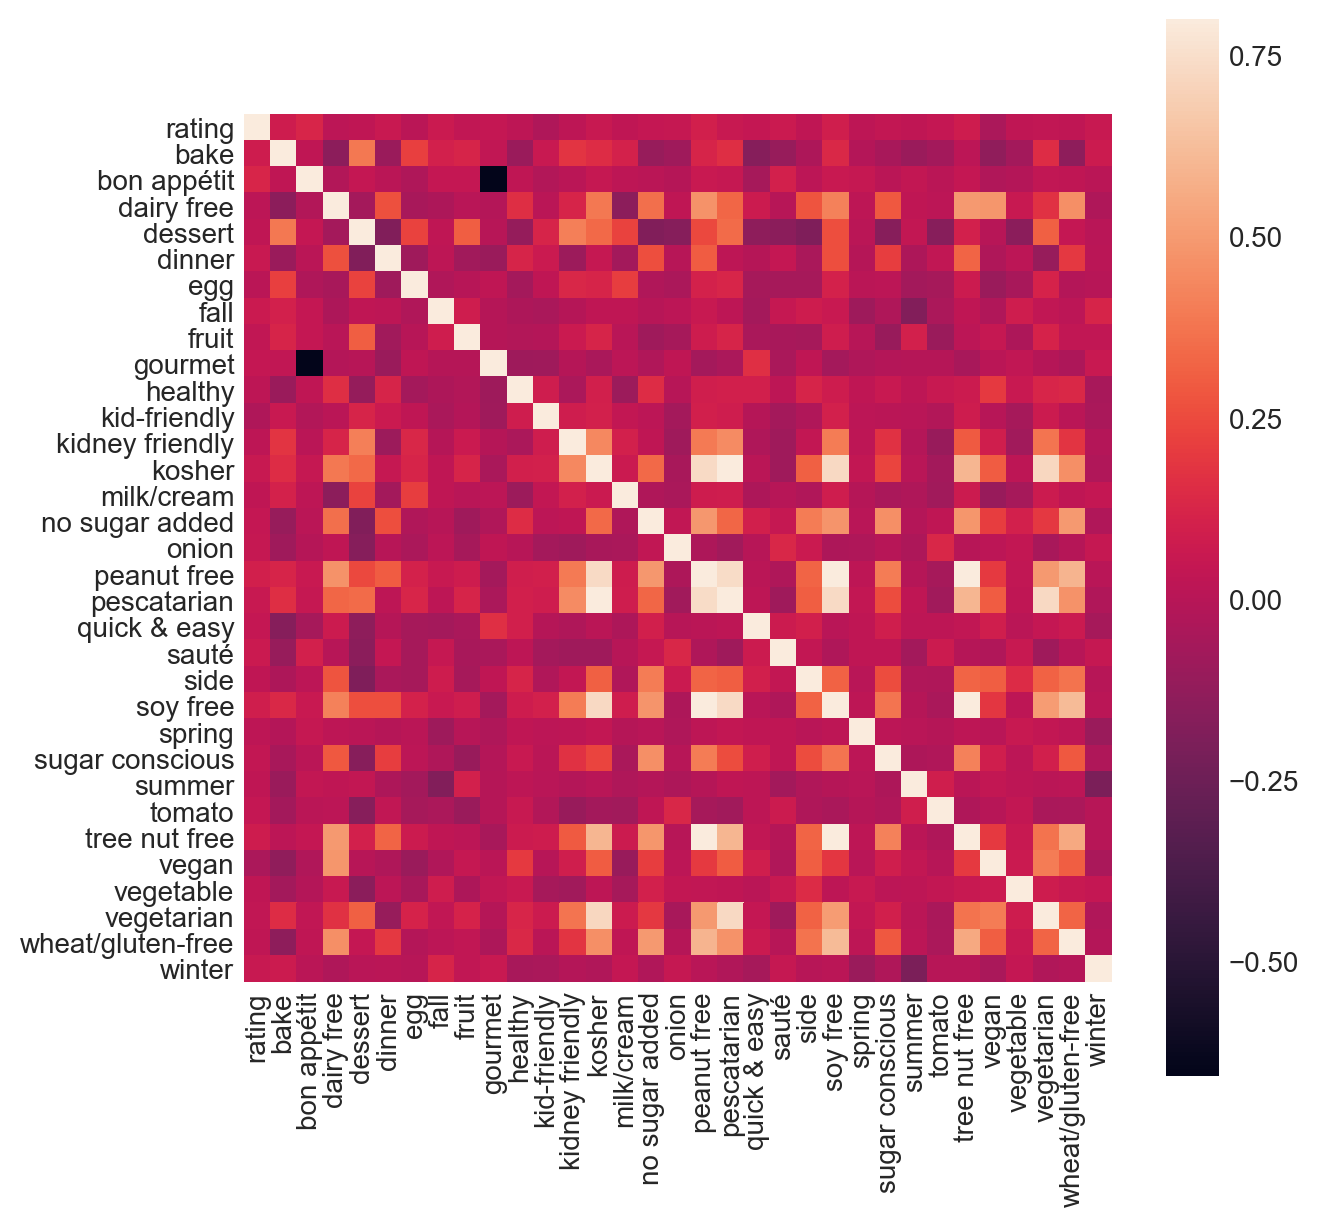

In [39]:
g = plt.figure(dpi=200, figsize=(7,7))
sns.heatmap(features.corr(), xticklabels=True, yticklabels=True, square=True, vmax=.8)

In [40]:
features['peanut/soy/tree nut free'] = np.where(features[['peanut free', 'soy free', 'tree nut free']].sum(axis=1) > 0, 1, 0)
features.drop(['peanut free', 'soy free', 'tree nut free'], 1, inplace=True)

In [41]:
features.head()

,title,rating,bake,bon appétit,dairy free,dessert,dinner,egg,fall,fruit,...,spring,sugar conscious,summer,tomato,vegan,vegetable,vegetarian,wheat/gluten-free,winter,peanut/soy/tree nut free
0,"Lentil, Apple, and Turkey Wrap",2.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,Potato and Fennel Soup Hodge,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,Spinach Noodle Casserole,3.125,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0


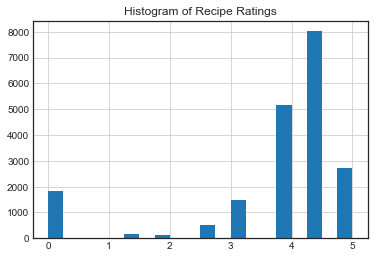

In [42]:
features.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [43]:
features.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [44]:
rating = features

In [45]:
# use mean of rating to determine good/bad rating
rating['rating'] = np.where(rating['rating'] > 3.71, 1, 0)

In [46]:
rating.head()

,title,rating,bake,bon appétit,dairy free,dessert,dinner,egg,fall,fruit,...,spring,sugar conscious,summer,tomato,vegan,vegetable,vegetarian,wheat/gluten-free,winter,peanut/soy/tree nut free
0,"Lentil, Apple, and Turkey Wrap",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
1,Boudin Blanc Terrine with Red Onion Confit,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,Potato and Fennel Soup Hodge,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,Mahi-Mahi in Tomato Olive Sauce,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,Spinach Noodle Casserole,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0


In [47]:
y = rating.rating
X = rating.loc[:, ~rating.columns.isin(['title', 'rating'])]

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [48]:
# mport Bernoulli
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

#fit model to data
bnb.fit(X_train, y_train)

#classify, store results in variable
y_pred = bnb.predict(X_test)

#display
print("number of mislabeled points out of total {} points: {}; {:.2f}% accurate".format(
    X_test.shape[0], (y_test != y_pred).sum(), ((1-y_test != y_pred).sum()/X_test.shape[0] * 100)
))

number of mislabeled points out of total 2006 points: 448; 77.67% accurate
